# Research Notebook 1
## Javier Humberto Arana Zelaya
## Date: Jan 26, 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

Your text here

- I attended group meeting for "Signals from Accreting Dark Stars" project to disscuss current status, help with resolving issues, and dissucs next steps as in what to try and accomplish for next meeting. 

- I wrote code to solve the Tolman-Oppenheimer-Volkoff equation for the one fluid case of dark matter, this is to get solutions for mass and radius according to an intial pressure and mass. 

- I am reading what is needed for our current objective from Pitz and Schaffner_Bielich. *Generating ultra-compact neutron stars with bosonic dark matter*

## Motivation:

Your text here

This project contributes to understanding how dark matter can structure, such as ultra-compact neutron stars with bosonic dark matter, these dark stars evolve which provid potential observational signatures for detecting bosonic dark matter. My goal is to deepen my expertise in solving the Tolman-Oppenheimer-Volkoff equations, while contributing to this exciting and fundamental area of research. By working on this project, I am also gaining valuable experience with numerical methods and developing skills that will benefit my future studies and collaborations.

Last week I was trying to tackle the two fluid Tolman-Oppenheimer-Volkoff equations but then I was told by my professor that I should do the one fluid case first as it is easier to debug, and then check for symmetry with the ordinary matter and dark matter case later on, after that, an I can perform well with the one fluid case then I believe I will be able to tackle the two fluid case.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

Your text here

I made an array of initial pressures, which now correspond to an array for mass and radius, however I am getting three arrays for mass and radius when I believe I was told I was only supposed to get one mass and one radius for the one initial condition of initial pressure and initial mass is always zero, so I should be getting a single curve for an array of central pressures. Here is my code: 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

###Define Constants 

Rel = True 
mb=1000
n=4
e_o=mb**4

###Define EoS and TOV equations

def f(r,y,Rel=True) :

    p, m = y 
    
    if p<= 0: 
        return [0,0]
    
    if m == 0: 
        e_DM = 0
        dpdr = 0 

    else:    
        e_DM = e_o * (p / e_o) ** (2 / n) + ((2+n)/(n-2))*p
        if Rel: 
            dpdr = -(p + e_DM) * (m + 4 * np.pi * r**3 * p) / (r * (r - 2 * m)) #from equation 
    
    e_DM = e_o * (p / e_o) ** (2 / n) + ((2+n)/(n-2))*p
    dmdr= 4*np.pi*(r**2)*e_DM
    dydt=[dpdr,dmdr]
    return dydt 
            

###creat stop condition when pressure equals zero 
def p0_equals_zero(r,y, Rel):
    p , _ = y 
    return p 

p0_equals_zero.terminal=True
p0_equals_zero.direction = -1


###Solve TOV equations 
p0_list = np.logspace(14,16,100)
R_span = [1e-5,10]
m_list=[]
r_list=[]

for p0 in p0_list:
    IntCon = [p0, 0]  

    solutions = solve_ivp(f, R_span, IntCon, method='RK45', t_eval=np.linspace(R_span[0], R_span[1], 1500), args=(True,), events=p0_equals_zero, dense_output=True)
    r= solutions.t 
    m= solutions.y[1]
    m_list.append(m)
    r_list.append(r)
    plt.plot(r, m, color="black", linestyle="--")


###interpret results
###plt.plot(r, m, color="black", linestyle="--")


plt.title('Mass vs Radius')
plt.xlabel('Radius (Natural units)')
plt.ylabel('Mass (Natural units)') 
plt.grid()
plt.show()


The equations in my f function are the TOV equations for one fluid (dark matter) case, and the equation of state, all in natural units, first is the equation of state that is being used:$$\epsilon=\epsilon_o(\frac{p_{DM}}{\epsilon_o})^{2/n} + \frac{n+2}{n-2}p_{DM}$$, then is the change of the darkstars pressure with respect to changing radius $$\frac{dp_{DM}}{dr}=-(p_{DM}+\epsilon_{DM})\frac{d\nu}{dr}$$, where $$\frac{d\nu}{dr}=\frac{m_{DM}+4\pi r^3 p_{DM}}{r(r-2m_{DM})}$$, then is the change in the darkstars mass with respect to the changing radius $$\frac{dm_{DM}}{dr}=4 \pi r^2 \epsilon_{DM}$$

Overall the code has been troubling to get a proper output so I am unsure of what I am doing wrong and will disscuss this with my mentor in next weeks meeting to hopefully trouble shoot what is wrong with my code, or maybe my mentor will know from when I show him my code.
                            





# 3: So what? (What does it mean?)
## Describe your results

Your text here

This means I am going to want to get the mass as a function of radius and basically for every central pressure there will be a corresponding Mass and Radius where it knows to stop because of the stop condition implimented in the code when pressure reaches zero. 

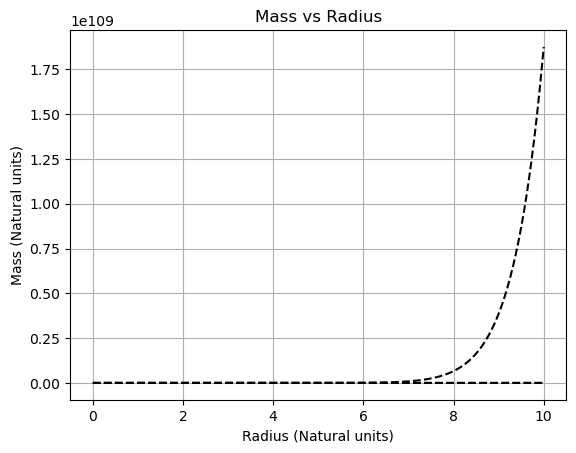
*Figure 1: Mass vs Radius curve for mb=1000MeV.*

Here in Figure 1, is a Mass vs Radius curve, here the results are showing that at small radiuses there is large mass, which is expexted but these radiuses are in the extremaly small as well as the masses, so I have to consult with my mentor to understand the situtation and hopefully resolve this problem.



# 4. Now what? (What's next?)
## Plan for the next week

Your text here

The plan for next week is to get a singular curve output, and to convert from natural units to more conventional units like kilometers and solar masses, Ideally I will be guided by my mentors and will make a break through with some clarification for my code hopefully to get reasonable solutions. I also want to hopefully be able to move on to the two fluid TOV equations case but it will depend on Mondays meeting I persume.

# 5. Bibliography

Your references here

[1] Sarah L. Pitz and J. Schaffner-Bielich, *Generating ultra-compact neutron stars with bosonic dark matter*, 12, arXiv preprint, 2024, arXiv:2408.13157 [astro-ph.HE]